In [92]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
all_dts = np.load('all_dts.npy')
all_mean_pvalues = np.load('all_means.npy')

In [94]:
all_dts = all_dts.reshape((19,))
all_mean_pvalues = all_mean_pvalues.reshape((19,))

In [95]:
mac_all_dts = np.load('mac_all_dts.npy')
mac_all_mean_pvalues = np.load('mac_all_means.npy')

mac_best_dt = np.load('mac_best_dt.npy')
mac_best_pval = np.load('mac_pval.npy')


pc_all_dts = np.load('pc_all_dts.npy')
pc_all_mean_pvalues = np.load('pc_all_means.npy')

pc_best_dt = np.load('pc_best_dt.npy')
pc_best_pval = np.load('pc_best_pval.npy')

In [96]:
all_dts = np.concatenate((mac_all_dts, pc_all_dts), axis=1).reshape((18,))
all_mean_pvalues = np.concatenate((mac_all_mean_pvalues, pc_all_mean_pvalues), axis=1).reshape(18,)

best_pval = max(all_mean_pvalues)
best_dt = all_dts[np.argmax(all_mean_pvalues)]

In [97]:
# average out 0.005 dt in the pvalue and remove the duplicate
all_mean_pvalues[np.where(all_dts == 0.005)[0]] = np.mean(all_mean_pvalues[np.where(all_dts == 0.005)])
np.delete(all_mean_pvalues, 9)
np.delete(all_dts, 9)

array([0.009 , 0.0085, 0.008 , 0.0075, 0.007 , 0.0065, 0.006 , 0.0055,
       0.005 , 0.0045, 0.004 , 0.0035, 0.003 , 0.0025, 0.002 , 0.0015,
       0.001 ])

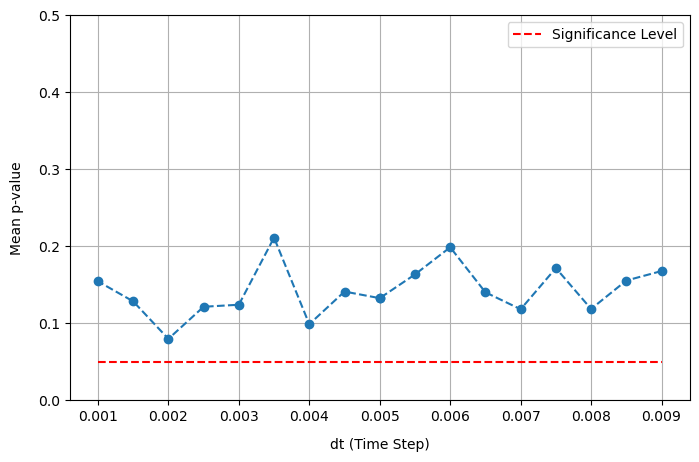

In [101]:
# Plot all iterations together
plt.figure(figsize=(8, 5))
plt.plot(all_dts, all_mean_pvalues, linestyle = 'dashed', marker='o')

plt.hlines([0.05], 0.001, 0.009, colors='r', linestyles='dashed', label='Significance Level')
plt.xlabel('dt (Time Step)', labelpad=10)
#plt.xticks(all_dts, rotation=0)
plt.ylim(0.0, 0.5)
plt.ylabel('Mean p-value', labelpad=10)
plt.grid(True)
plt.savefig('grid_search_dt_deep.svg', transparent=True)
plt.legend()
plt.show()

In [ ]:
0.01, 0.1059

array([0.01 , 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002,
       0.001])

In [14]:
np.linspace(0.009, 0.005, 9)

array([0.009 , 0.0085, 0.008 , 0.0075, 0.007 , 0.0065, 0.006 , 0.0055,
       0.005 ])

In [15]:
np.linspace(0.005, 0.001, 9)

array([0.005 , 0.0045, 0.004 , 0.0035, 0.003 , 0.0025, 0.002 , 0.0015,
       0.001 ])